In [1]:
names=["espalda0","bicep0","triceps0","pecho0"]
classes=[0,1,2,3]


focusIndexIn=3
incT=50

winIndSize=list(range(-39,1,1))

print(winIndSize, "#", len(winIndSize))


[-39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0] # 40


In [2]:
import numpy as np
from pandas import read_csv    

import time

from datetime import datetime
from numpy import mean



X=[]
Y=[]
Z=[]
L=[]
TT=[]
C=[]




incT0=0
N=0
for iname,name in enumerate(names):
    
    if(classes[iname]!=focusIndexIn):
        continue
    
    series=read_csv(name+".tsv", sep="\t",parse_dates=False)
    Ylabel=read_csv(name+".L.tsv", sep="\t",parse_dates=False)

    print(series.values)
            
    TY=np.array(Ylabel["timestamp"])
    LY=np.array(Ylabel["label"])

    print("TL0:",TY)
    print("LY0:",LY)


    lastT=-1
    for i in range(0,len(TY)):
        if(LY[i]==0 or LY[i]==-1):
            TY[i]=TY[i]+lastT
            lastT=TY[i]
        if(LY[i]==1):
            lastT=TY[i]
        if(LY[i]==-1):
            lastT=-1

    print("TL:",TY)
    print("LY:",LY)

    T=np.array(series["timestamp"])

    t0=T[0]
    tY0=TY[0]
    tN=T[-1]
    print(t0,tN)

    tY0=int(tY0/incT)*incT
    t0=int(t0/incT)*incT
    tN=int(tN/incT)*incT

    print("TIMES:",t0,tN, (int)(tN-t0)/1000)


    v0=0
    sesion=False
    for ti in range(t0,tN,incT):
        print("ti:",ti, ti-t0)

        i=np.where( (TY>=ti-t0) & (TY<=ti+incT-t0))
        print("i2:",i[0], "LY:",LY[i[0]])

        if(len(i[0])>0):
            l=LY[i[0][0]]
            if(l==1):
                v0=0
                sesion=True
            if(l==-1):
                v0=0
                sesion=False    
            if(l==0):
                v0=0


        if(sesion):
            v0=v0+0.01
            print("v0:",v0)
            L.append(v0)
        else:
            L.append(-1)


        i=np.where( (T>=ti) & (T<=ti+incT))
        print(i)
        print(series.values[i])

        x0=mean(series.values[i][:,0])
        y0=mean(series.values[i][:,1])
        z0=mean(series.values[i][:,2])
        
        print("x0",x0,"y0",y0,"z0",z0)
        #print("X",X,"Y",Y,"Z",Z)

        if(sesion):
            X.append(x0)
            Z.append(z0)
            Y.append(y0)         
        else:
            X.append(x0)
            Z.append(z0)     
            Y.append(y0)         
        #print(x0,y0,z0)    



        TT.append(ti-t0+incT0)
        C.append(classes[iname])
        N=N+1
    #ZZincT0=incT0+ti-t0

[[ 3.20000000e+00 -2.00000000e-01  8.80000000e+00  1.68857629e+12]
 [ 2.10000000e+00  2.00000000e-01  8.60000000e+00  1.68857629e+12]
 [ 2.00000000e+00  9.00000000e-01  8.50000000e+00  1.68857629e+12]
 ...
 [-7.20000000e+00 -1.60000000e+00  5.90000000e+00  1.68857655e+12]
 [-7.20000000e+00 -1.60000000e+00  5.80000000e+00  1.68857655e+12]
 [-7.30000000e+00 -1.50000000e+00  5.80000000e+00  1.68857655e+12]]
TL0: [ 35500   3500   3500   3500   3500   3500   3500   3500   3500   3500
   3000   3000    500 102000   3500   3000   3000   3000   3000   3500
   3500   3500   3500   3500    500 158000   3500   4000   3500   3000
   3000   3500   3500   3500   3500   3500    500 212000   3500   3000
   3000   3500   3000   3500   3500   3500   3500   3500    500]
LY0: [ 1  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0
 -1  1  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0
 -1]
TL: [ 35500  39000  42500  46000  49500  53000  56500  60000  63500  67000
  70000

x0 -7.266666666666667 y0 0.9333333333333332 z0 5.833333333333333
ti: 1688576321700 27800
i2: [] LY: []
(array([1389, 1390], dtype=int64),)
[[-7.30000000e+00  1.00000000e+00  5.90000000e+00  1.68857632e+12]
 [-7.10000000e+00  9.00000000e-01  5.70000000e+00  1.68857632e+12]]
x0 -7.199999999999999 y0 0.95 z0 5.800000000000001
ti: 1688576321750 27850
i2: [] LY: []
(array([1391, 1392, 1393], dtype=int64),)
[[-7.20000000e+00  1.00000000e+00  5.90000000e+00  1.68857632e+12]
 [-7.30000000e+00  9.00000000e-01  5.70000000e+00  1.68857632e+12]
 [-7.20000000e+00  9.00000000e-01  5.80000000e+00  1.68857632e+12]]
x0 -7.233333333333333 y0 0.9333333333333332 z0 5.800000000000001
ti: 1688576321800 27900
i2: [] LY: []
(array([1394, 1395], dtype=int64),)
[[-7.20000000e+00  8.00000000e-01  5.70000000e+00  1.68857632e+12]
 [-7.20000000e+00  9.00000000e-01  5.70000000e+00  1.68857632e+12]]
x0 -7.2 y0 0.8500000000000001 z0 5.7
ti: 1688576321850 27950
i2: [] LY: []
(array([1396, 1397, 1398], dtype=int64),)
[[

[[-8.40000000e+00 -2.90000000e+00 -2.40000000e+00  1.68857635e+12]
 [-1.02000000e+01 -2.00000000e+00 -2.00000000e+00  1.68857635e+12]]
x0 -9.3 y0 -2.45 z0 -2.2
ti: 1688576349850 55950
i2: [] LY: []
v0: 0.6000000000000003
(array([2796, 2797, 2798], dtype=int64),)
[[-1.02000000e+01 -8.00000000e-01 -2.20000000e+00  1.68857635e+12]
 [-1.07000000e+01 -5.00000000e-01 -1.80000000e+00  1.68857635e+12]
 [-1.18000000e+01 -8.00000000e-01 -1.90000000e+00  1.68857635e+12]]
x0 -10.9 y0 -0.7000000000000001 z0 -1.9666666666666668
ti: 1688576349900 56000
i2: [] LY: []
v0: 0.6100000000000003
(array([2799, 2800], dtype=int64),)
[[-1.30000000e+01 -1.10000000e+00 -1.90000000e+00  1.68857635e+12]
 [-1.13000000e+01 -5.00000000e-01 -1.60000000e+00  1.68857635e+12]]
x0 -12.15 y0 -0.8 z0 -1.75
ti: 1688576349950 56050
i2: [] LY: []
v0: 0.6200000000000003
(array([2801, 2802, 2803], dtype=int64),)
[[-1.30000000e+01 -4.00000000e-01 -1.10000000e+00  1.68857635e+12]
 [-1.00000000e+01 -1.70000000e+00 -1.70000000e+00  

x0 -7.533333333333334 y0 0.16666666666666666 z0 5.466666666666666
ti: 1688576375200 81300
i2: [] LY: []
(array([4064, 4065], dtype=int64),)
[[-7.60000000e+00  1.00000000e-01  5.40000000e+00  1.68857638e+12]
 [-7.50000000e+00  0.00000000e+00  5.50000000e+00  1.68857638e+12]]
x0 -7.55 y0 0.05 z0 5.45
ti: 1688576375250 81350
i2: [] LY: []
(array([4066, 4067, 4068], dtype=int64),)
[[-7.60000000e+00  1.00000000e-01  5.60000000e+00  1.68857638e+12]
 [-7.50000000e+00  1.00000000e-01  5.50000000e+00  1.68857638e+12]
 [-7.60000000e+00  2.00000000e-01  5.40000000e+00  1.68857638e+12]]
x0 -7.566666666666666 y0 0.13333333333333333 z0 5.5
ti: 1688576375300 81400
i2: [] LY: []
(array([4069, 4070], dtype=int64),)
[[-7.60000000e+00  0.00000000e+00  5.50000000e+00  1.68857638e+12]
 [-7.60000000e+00  1.00000000e-01  5.50000000e+00  1.68857638e+12]]
x0 -7.6 y0 0.05 z0 5.5
ti: 1688576375350 81450
i2: [] LY: []
(array([4071, 4072, 4073], dtype=int64),)
[[-7.60000000e+00  1.00000000e-01  5.30000000e+00  1.6

(array([5461, 5462, 5463], dtype=int64),)
[[-6.0000000e+00 -5.0000000e-01 -3.5000000e+00  1.6885764e+12]
 [-5.1000000e+00  7.0000000e-01 -2.8000000e+00  1.6885764e+12]
 [-5.8000000e+00  3.3000000e+00 -2.2000000e+00  1.6885764e+12]]
x0 -5.633333333333333 y0 1.1666666666666667 z0 -2.8333333333333335
ti: 1688576403200 109300
i2: [] LY: []
v0: 0.17
(array([5464, 5465], dtype=int64),)
[[-6.9000000e+00  4.0000000e+00 -2.7000000e+00  1.6885764e+12]
 [-6.7000000e+00  2.5000000e+00 -3.9000000e+00  1.6885764e+12]]
x0 -6.800000000000001 y0 3.25 z0 -3.3
ti: 1688576403250 109350
i2: [] LY: []
v0: 0.18000000000000002
(array([5466, 5467, 5468], dtype=int64),)
[[-7.5000000e+00  3.6000000e+00 -4.0000000e+00  1.6885764e+12]
 [-8.0000000e+00  4.8000000e+00 -3.2000000e+00  1.6885764e+12]
 [-7.9000000e+00  4.9000000e+00 -3.0000000e+00  1.6885764e+12]]
x0 -7.8 y0 4.433333333333334 z0 -3.4
ti: 1688576403300 109400
i2: [] LY: []
v0: 0.19000000000000003
(array([5469, 5470], dtype=int64),)
[[-8.7000000e+00  3.4

x0 -0.3333333333333333 y0 0.6666666666666666 z0 9.200000000000001
ti: 1688576430500 136600
i2: [] LY: []
(array([6829, 6830], dtype=int64),)
[[ 4.00000000e-01  3.00000000e-01  9.20000000e+00  1.68857643e+12]
 [-9.00000000e-01 -3.30000000e+00  1.67000000e+01  1.68857643e+12]]
x0 -0.25 y0 -1.5 z0 12.95
ti: 1688576430550 136650
i2: [] LY: []
(array([6831, 6832, 6833], dtype=int64),)
[[-4.40000000e+00  9.70000000e+00  3.92000000e+01  1.68857643e+12]
 [ 1.94000000e+01 -4.70000000e+00  1.95000000e+01  1.68857643e+12]
 [ 2.40000000e+00 -6.80000000e+00  3.00000000e+00  1.68857643e+12]]
x0 5.8 y0 -0.6000000000000002 z0 20.566666666666666
ti: 1688576430600 136700
i2: [] LY: []
(array([6834, 6835], dtype=int64),)
[[-4.80000000e+00 -1.00000000e+00  5.70000000e+00  1.68857643e+12]
 [ 2.00000000e-01 -1.00000000e-01  5.00000000e+00  1.68857643e+12]]
x0 -2.3 y0 -0.55 z0 5.35
ti: 1688576430650 136750
i2: [] LY: []
(array([6836, 6837, 6838], dtype=int64),)
[[ 2.00000000e+00 -1.50000000e+00  2.70000000e+

x0 -9.0 y0 0.8000000000000002 z0 -2.233333333333333
ti: 1688576460700 166800
i2: [] LY: []
v0: 0.2700000000000001
(array([8339, 8340], dtype=int64),)
[[-9.40000000e+00  7.00000000e-01 -2.40000000e+00  1.68857646e+12]
 [-9.40000000e+00  1.10000000e+00 -2.30000000e+00  1.68857646e+12]]
x0 -9.4 y0 0.9 z0 -2.3499999999999996
ti: 1688576460750 166850
i2: [] LY: []
v0: 0.2800000000000001
(array([8341, 8342, 8343], dtype=int64),)
[[-8.80000000e+00  1.20000000e+00 -2.00000000e+00  1.68857646e+12]
 [-8.90000000e+00  1.40000000e+00 -2.30000000e+00  1.68857646e+12]
 [-8.80000000e+00  1.70000000e+00 -2.00000000e+00  1.68857646e+12]]
x0 -8.833333333333334 y0 1.4333333333333333 z0 -2.1
ti: 1688576460800 166900
i2: [] LY: []
v0: 0.2900000000000001
(array([8344, 8345], dtype=int64),)
[[-8.40000000e+00  2.10000000e+00 -2.10000000e+00  1.68857646e+12]
 [-8.60000000e+00  2.30000000e+00 -2.60000000e+00  1.68857646e+12]]
x0 -8.5 y0 2.2 z0 -2.35
ti: 1688576460850 166950
i2: [] LY: []
v0: 0.3000000000000001


[[-7.60000000e+00  9.00000000e-01  5.40000000e+00  1.68857649e+12]
 [-7.60000000e+00  9.00000000e-01  5.40000000e+00  1.68857649e+12]]
x0 -7.6 y0 0.9 z0 5.4
ti: 1688576490050 196150
i2: [] LY: []
(array([9806, 9807, 9808], dtype=int64),)
[[-7.70000000e+00  1.10000000e+00  5.60000000e+00  1.68857649e+12]
 [-7.50000000e+00  8.00000000e-01  5.60000000e+00  1.68857649e+12]
 [-7.50000000e+00  6.00000000e-01  5.30000000e+00  1.68857649e+12]]
x0 -7.566666666666666 y0 0.8333333333333334 z0 5.5
ti: 1688576490100 196200
i2: [] LY: []
(array([9809, 9810], dtype=int64),)
[[-7.80000000e+00  4.00000000e-01  5.50000000e+00  1.68857649e+12]
 [-7.60000000e+00  1.00000000e+00  5.40000000e+00  1.68857649e+12]]
x0 -7.699999999999999 y0 0.7 z0 5.45
ti: 1688576490150 196250
i2: [] LY: []
(array([9811, 9812, 9813], dtype=int64),)
[[-7.80000000e+00  9.00000000e-01  5.60000000e+00  1.68857649e+12]
 [-7.50000000e+00  3.00000000e-01  5.10000000e+00  1.68857649e+12]
 [-7.60000000e+00  6.00000000e-01  4.90000000e+

x0 -7.766666666666666 y0 3.6999999999999997 z0 -1.6000000000000003
ti: 1688576517400 223500
i2: [] LY: []
v0: 0.4100000000000002
(array([11174, 11175], dtype=int64),)
[[-7.90000000e+00  4.70000000e+00 -2.30000000e+00  1.68857652e+12]
 [-8.70000000e+00  5.80000000e+00 -2.70000000e+00  1.68857652e+12]]
x0 -8.3 y0 5.25 z0 -2.5
ti: 1688576517450 223550
i2: [] LY: []
v0: 0.4200000000000002
(array([11176, 11177, 11178], dtype=int64),)
[[-8.80000000e+00  5.20000000e+00 -2.40000000e+00  1.68857652e+12]
 [-8.50000000e+00  3.80000000e+00 -2.80000000e+00  1.68857652e+12]
 [-7.90000000e+00  3.70000000e+00 -3.00000000e+00  1.68857652e+12]]
x0 -8.4 y0 4.233333333333333 z0 -2.733333333333333
ti: 1688576517500 223600
i2: [] LY: []
v0: 0.4300000000000002
(array([11179, 11180], dtype=int64),)
[[-8.20000000e+00  4.20000000e+00 -3.40000000e+00  1.68857652e+12]
 [-8.60000000e+00  4.40000000e+00 -3.80000000e+00  1.68857652e+12]]
x0 -8.399999999999999 y0 4.300000000000001 z0 -3.5999999999999996
ti: 168857651

In [3]:
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
L=np.array(L)
TT=np.array(TT)
C=np.array(C)

In [4]:
X = (X-np.min(X))/(np.max(X)-np.min(X))
Y = (Y-np.min(Y))/(np.max(Y)-np.min(Y))
Z = (Z-np.min(Z))/(np.max(Z)-np.min(Z))
    




In [5]:
import matplotlib.pyplot as plt


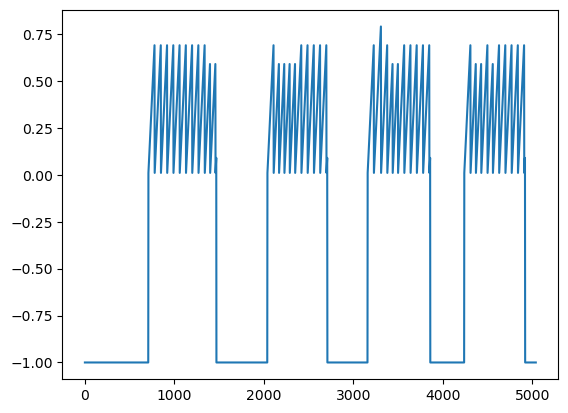

In [6]:
plt.figure()
plt.plot(L)
plt.show()

<AxesSubplot:xlabel='Time'>

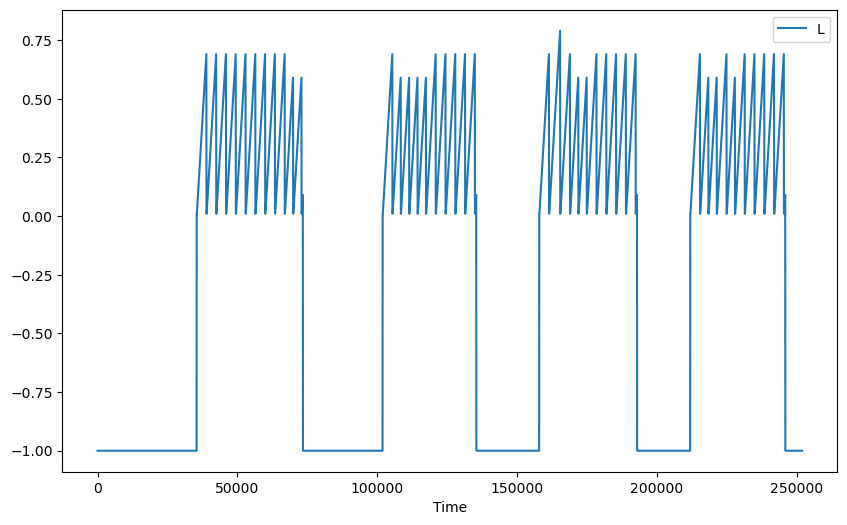

In [7]:
import pandas as pd

df = pd.DataFrame()
df['Time']=TT
df['L']=L


df.plot(x="Time", legend=True, figsize=(10,6))


<AxesSubplot:xlabel='Time'>

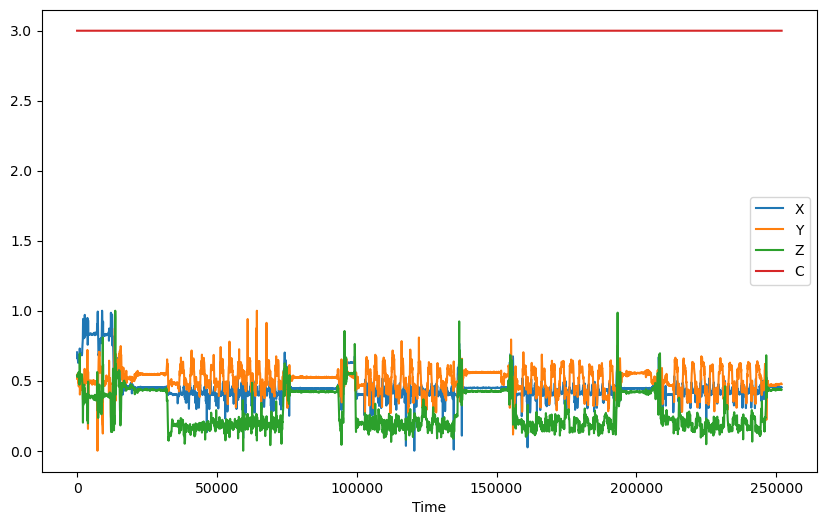

In [8]:
df = pd.DataFrame()
df['Time']=TT
df['X']=X
df['Y']=Y
df['Z']=Z
df['C']=C

df.plot(x="Time", legend=True, figsize=(10,6))

In [9]:
XYZ=[]
Yreg=[]
for i in range(0,N):
    if(L[i]<0):
        continue
    print("i:",i)
    x1=[]
    y1=[]
    z1=[]
    for it in winIndSize:
        x1.append(X[i+it])
        y1.append(Y[i+it])
        z1.append(Z[i+it])
    xi=[]
    print("x1",x1)
    xi.append(x1)
    xi.append(y1)
    xi.append(z1)
    XYZ.append(np.transpose(xi))
    Yreg.append(L[i])
XYZ=np.array(XYZ)
Yreg=np.array(Yreg)

i: 709
x1 [0.4047904191616767, 0.4083832335329342, 0.4083832335329342, 0.4099800399201597, 0.4083832335329342, 0.40439121756487023, 0.4059880239520959, 0.4059880239520959, 0.4047904191616767, 0.4075848303393214, 0.40359281437125755, 0.4027944111776448, 0.40239520958083835, 0.40199600798403196, 0.40239520958083835, 0.4003992015968064, 0.3964071856287426, 0.40119760479041916, 0.4000000000000001, 0.3988023952095809, 0.3988023952095809, 0.40119760479041916, 0.40119760479041916, 0.4003992015968064, 0.40119760479041916, 0.40199600798403196, 0.4000000000000001, 0.4003992015968064, 0.4000000000000001, 0.4027944111776448, 0.3988023952095809, 0.40199600798403196, 0.40119760479041916, 0.40199600798403196, 0.40239520958083835, 0.40119760479041916, 0.40239520958083835, 0.40119760479041916, 0.40119760479041916, 0.40359281437125755]
i: 710
x1 [0.4083832335329342, 0.4083832335329342, 0.4099800399201597, 0.4083832335329342, 0.40439121756487023, 0.4059880239520959, 0.4059880239520959, 0.4047904191616767

In [10]:
print(XYZ.shape)
print(Yreg.shape)   

(2810, 40, 3)
(2810,)


In [11]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from keras.losses import mean_squared_error

from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    
    
from sklearn.model_selection import KFold


#Dividimos los datos en K fold para cross validation
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(XYZ)

f = open("prediction_xyz_w.tsv", "w") 
f.write("")
f.close()

Y_pred=[]
Y_real=[]
I_index=[]

for train_index, test_index in kf.split(XYZ):
    #Datos de train y test
    print("TRAIN:", train_index, "TEST:", test_index)
    XYZ_train, XYZ_test = XYZ[train_index], XYZ[test_index]
    Yreg_train, Yreg_test = Yreg[train_index], Yreg[test_index]

    
    model = keras.Sequential()

    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(XYZ.shape[1],XYZ.shape[2])))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

    model.add(Dropout(0.25))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.25))
    model.add(LSTM(256))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Dense(512))
    model.add(Dense(1,activation="sigmoid"))



    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()

    history = model.fit(XYZ_train , Yreg_train,
                    batch_size=64,
            validation_data=(XYZ_test , Yreg_test),
            epochs=5)
    
    yhat = model.predict(XYZ_test)
    
    f = open("prediction_xyz_w.tsv", "a")
    for i in range(0,len(yhat)):
        f.write(str(test_index[i])+"\t"+str(yhat[i][0]).replace('.',',')+"\t"+str(Yreg_test[i]).replace('.',',')+"\n")
    f.close()
    
    Y_pred.append(yhat[i][0])
    Y_real.append(Yreg_test[i])
    I_index.append(test_index[i])

TRAIN: [   0    1    3 ... 2807 2808 2809] TEST: [   2   43   46   54   57   64   84   89   99  108  110  116  118  124
  128  142  145  146  157  206  211  214  220  223  230  248  252  265
  282  286  287  302  303  319  344  349  362  369  371  377  383  384
  407  441  482  489  495  499  504  511  526  537  555  558  585  608
  631  635  637  638  654  670  677  689  691  729  753  763  782  793
  844  849  857  875  881  893  904  905  936  940  943  957  962  972
  979 1001 1022 1044 1052 1074 1075 1085 1105 1107 1109 1128 1130 1133
 1139 1165 1180 1184 1193 1200 1205 1220 1228 1233 1240 1241 1242 1256
 1260 1280 1281 1288 1296 1306 1338 1342 1344 1356 1358 1363 1368 1397
 1402 1405 1417 1423 1429 1442 1450 1488 1496 1503 1505 1513 1518 1521
 1526 1529 1531 1542 1544 1563 1565 1566 1576 1578 1589 1609 1626 1633
 1656 1672 1675 1688 1691 1708 1709 1711 1718 1744 1745 1770 1786 1790
 1796 1816 1819 1821 1832 1833 1849 1858 1872 1882 1883 1891 1899 1962
 1970 1983 1996 1997 1998 19

9/9 [==============================] - 1s 60ms/step
TRAIN: [   0    1    2 ... 2807 2808 2809] TEST: [  20   26   39   41   55   61   73   74   93   95  105  114  117  138
  153  154  156  165  169  170  174  177  196  203  204  218  240  246
  274  280  306  310  314  320  330  346  347  355  356  364  388  392
  406  434  438  439  440  461  471  483  487  538  539  541  563  565
  570  575  576  595  601  604  614  618  657  678  680  684  695  696
  704  705  715  721  724  732  734  735  747  748  758  784  789  790
  798  808  812  825  838  860  863  866  867  885  892  913  920  928
  933  934  945  950  953  960  964  974  976  988  997 1005 1006 1009
 1010 1013 1025 1035 1042 1050 1053 1055 1056 1059 1077 1081 1083 1093
 1110 1119 1123 1124 1163 1183 1186 1188 1192 1206 1207 1210 1213 1216
 1218 1245 1253 1258 1279 1282 1286 1289 1292 1293 1294 1312 1313 1317
 1319 1320 1322 1331 1357 1360 1371 1388 1419 1421 1427 1445 1453 1457
 1458 1470 1471 1472 1482 1485 1492 1504 1632 1

40/40 [==============================] - 28s 593ms/step - loss: 0.0406 - val_loss: 0.0287
Epoch 2/5
40/40 [==============================] - 23s 577ms/step - loss: 0.0294 - val_loss: 0.0285
Epoch 3/5
40/40 [==============================] - 26s 654ms/step - loss: 0.0287 - val_loss: 0.0227
Epoch 4/5
40/40 [==============================] - 27s 677ms/step - loss: 0.0273 - val_loss: 0.0217
Epoch 5/5
9/9 [==============================] - 2s 109ms/step
TRAIN: [   0    2    3 ... 2807 2808 2809] TEST: [   1   10   13   16   18   27   47   58   65   68   85   94  131  136
  139  159  161  197  208  212  213  221  222  244  247  250  254  257
  263  277  284  291  318  338  350  357  365  366  379  380  390  391
  411  425  429  432  447  457  472  491  501  507  517  522  524  530
  531  549  557  559  573  584  594  603  606  612  619  652  653  665
  671  681  697  712  717  727  741  752  769  804  811  814  815  817
  832  840  842  853  855  861  876  886  888  889  891  907  910  917
 

Total params: 1,740,625
Trainable params: 1,740,625
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
40/40 [==============================] - 32s 699ms/step - loss: 0.0429 - val_loss: 0.0323
Epoch 2/5
40/40 [==============================] - 27s 672ms/step - loss: 0.0354 - val_loss: 0.0347
Epoch 3/5
40/40 [==============================] - 27s 677ms/step - loss: 0.0284 - val_loss: 0.0284
Epoch 4/5
40/40 [==============================] - 28s 691ms/step - loss: 0.0266 - val_loss: 0.0295
Epoch 5/5
9/9 [==============================] - 2s 103ms/step
TRAIN: [   0    1    2 ... 2807 2808 2809] TEST: [  14   34   37   42   51   62   66   72   81   86   87   91   92   97
  103  113  144  152  158  172  173  180  181  191  215  225  233  239
  245  276  283  288  299  300  307  311  316  323  328  389  393  397
  401  409  413  430  436  443  454  456  459  467  481  488  509  523
  532  540  544  546  566  568  586  588  589  590  599  615  

                                                                 
Total params: 1,740,625
Trainable params: 1,740,625
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
40/40 [==============================] - 28s 597ms/step - loss: 0.0409 - val_loss: 0.0340
Epoch 2/5
40/40 [==============================] - 19s 473ms/step - loss: 0.0309 - val_loss: 0.0245
Epoch 3/5
40/40 [==============================] - 19s 466ms/step - loss: 0.0290 - val_loss: 0.0230
Epoch 4/5
40/40 [==============================] - 19s 468ms/step - loss: 0.0268 - val_loss: 0.0305
Epoch 5/5
9/9 [==============================] - 1s 99ms/step


<AxesSubplot:xlabel='I_index'>

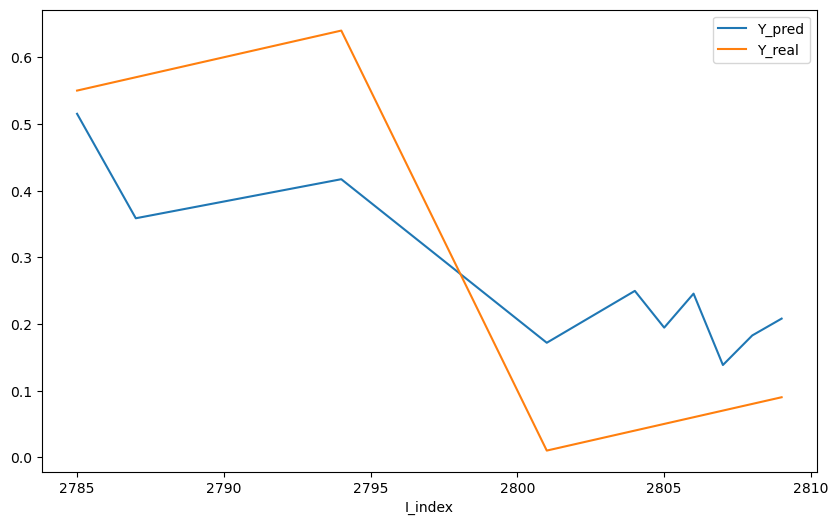

In [13]:

Y_pred=np.array(Y_pred)
Y_real=np.array(Y_real)
I_index=np.array(I_index)

sort = np.argsort(I_index)
I_index=I_index[sort]
Y_real=Y_real[sort]
Y_pred=Y_pred[sort]

df = pd.DataFrame()
df['I_index']=I_index
df['Y_pred']=Y_pred
df['Y_real']=Y_real


df.plot(x="I_index", legend=True, figsize=(10,6))